In [6]:
#Installing the Necessary Libraries to Perform Analysis
import numpy as np
import pandas as pd
from pandas_datareader import data,wb
import datetime
%matplotlib inline

In [7]:
#Collecting the stock data from the banks during recession between 2006-2016
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [10]:
#Adding stock ticker for each bank I want to compare
#Bank of America, Citi, Goldman Sachs, JPMorgan, Morgan Stanley, Wells Fargo
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], 'stooq', start, end)

In [11]:
#Creating a list of the ticker symbols as strings
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [13]:
#Now going to Concatonate all the df into one that's just called "bank_data"
bank_data = pd.concat([BAC, C, GS, JPM, MS, WFC], axis = 1, keys = tickers)
bank_data.columns.names = ['Bank Ticker', 'Stock Info']

In [14]:
bank_data.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04   39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05   39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06   39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09   39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   408.615  398.112  407.891  1.858097e+06  ...  37.4934  38.3558   
2006-01-04   406.325  400.089  400.354  2.260921e+06  ...  38.4971  38.8778   
2006-01-05   403.663  400.520  402.321  1.371893e+06  ...  38.2675  38.4264   
2006-01-06   404.641  398.865  402.321  1.655812e+06  ...  38.5432  38.5922   
2006-01-09   403.329  399.678  400.432  2.031072e+06  ...  38.4470  38.8846   

Bank Ticker                                      WFC                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04   38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05   38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06   38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09   38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   22.9581  1.530724e+07  
2006-01-04   22.6917  1.510382e+07  
2006-01-05   22.6690  1.407726e+07  
2006-01-06   22.7983  1.167705e+07  
2006-01-09   22.7983  7.808415e+06  

[5 rows x 30 columns]

In [15]:
#NOW EXPLORING THE DATA AFTER CLEANING AND FORMATTING IT
#What is the max close price for each bank's stock throughout the time period?
bank_data.xs(key='Close', axis = 1, level = 'Stock Info').max()

Bank Ticker
BAC     46.2013
C      466.8120
GS     203.6910
JPM     57.1634
MS      58.5624
WFC     47.0925
dtype: float64

In [16]:
#Creating new DataFrame that calculates the return for each bank's stock (rt = (pt/pt-1) - 1)
returns = pd.DataFrame()

In [17]:
#Create a for loop that will create return column for each Bank Stock ticker
for tick in tickers:
    returns[tick+' Return'] = bank_data[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.000000


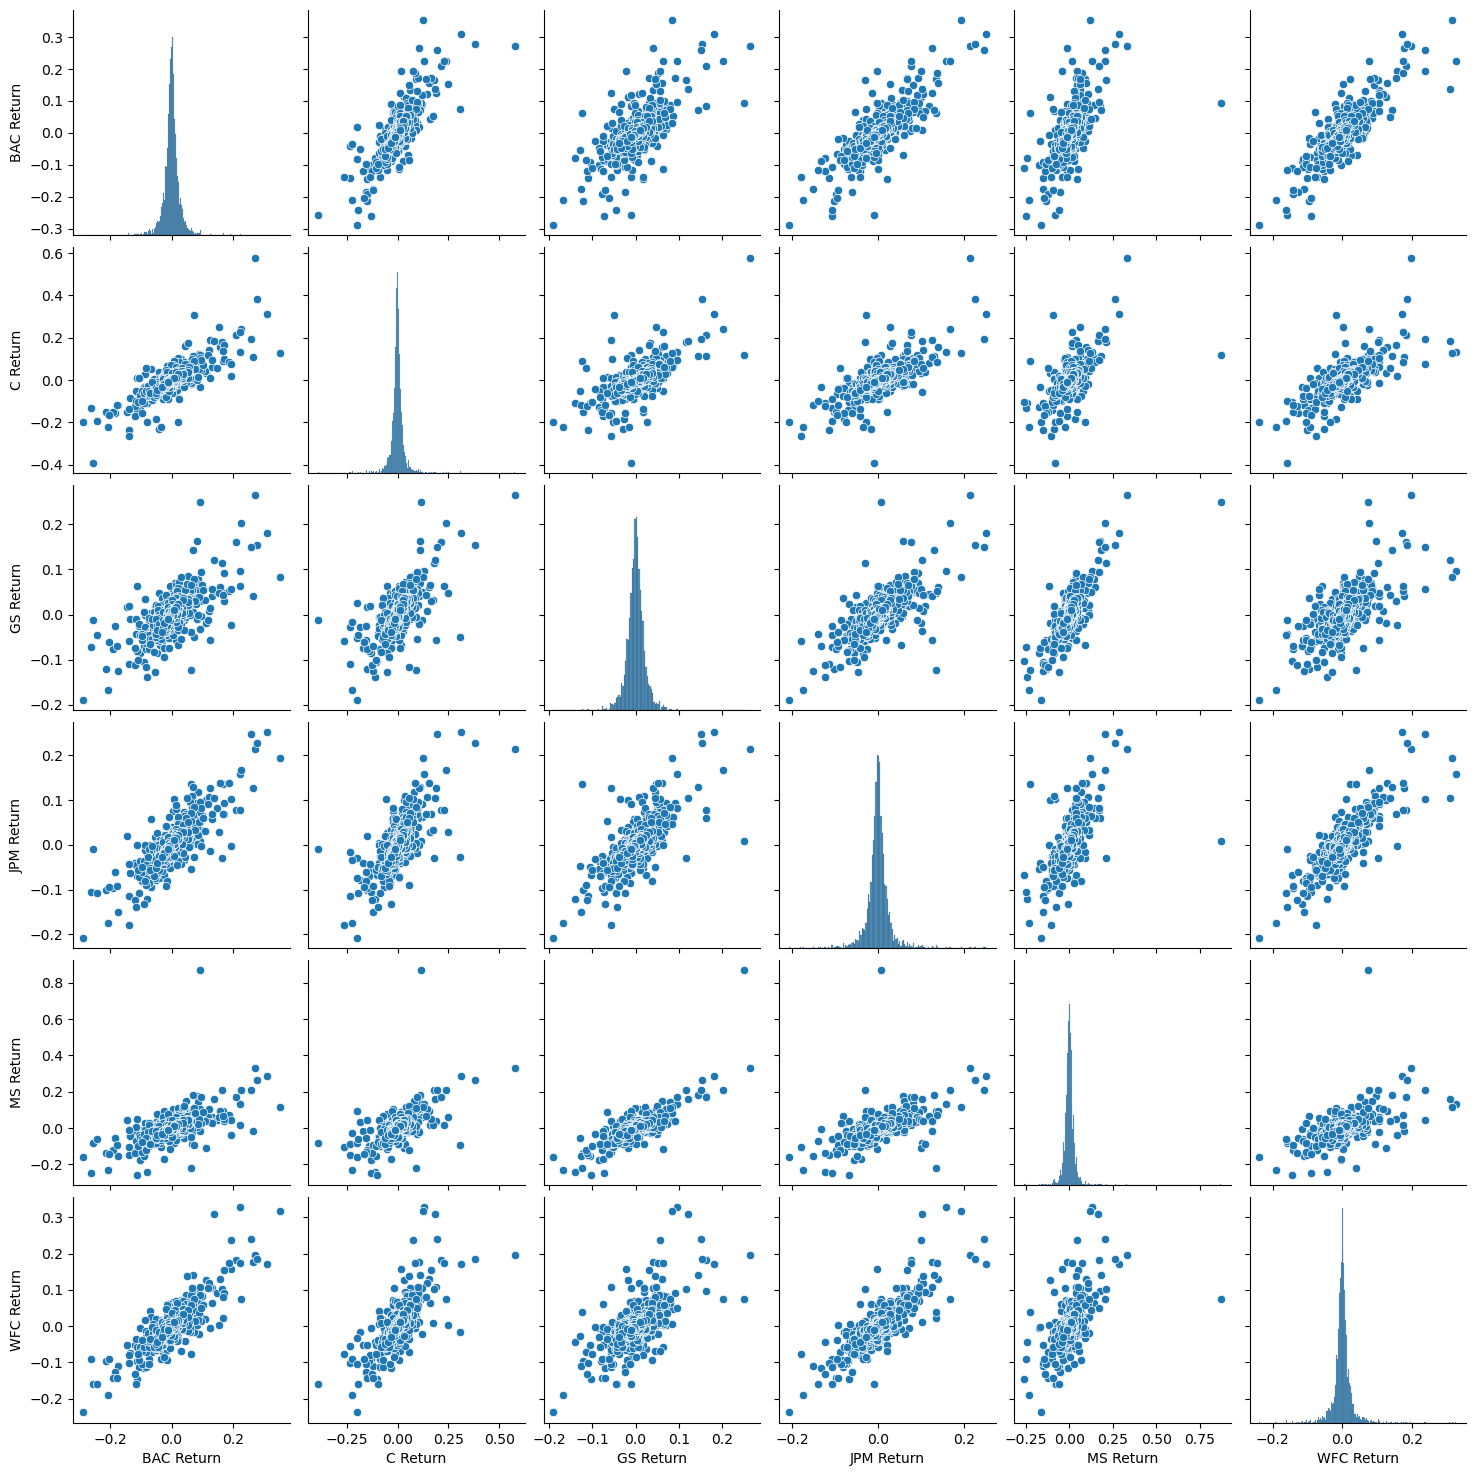

In [18]:
#Utilize seaborn to creat a pairplot utilizing returns Data Frame
import seaborn as sns
sns.pairplot(returns[1:])

In [19]:
#Figuring out what dates each bank stock has the best and worst single day returns
#4 of the banks share the same day for worst drop, Could be Inaguration?
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [21]:
#Citi had a stock split during 2011, JPM had max day after inaguration
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [23]:
#Which bank had the riskiest stock? 
returns.std() # Citi had the riskiest stock for all years

BAC Return    0.036605
C Return      0.038615
GS Return     0.025371
JPM Return    0.027670
MS Return     0.037708
WFC Return    0.030221
dtype: float64

In [29]:
#More Visualization with this data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Text(0.5, 1.0, 'Close Price for Each Bank (2006-2016)')

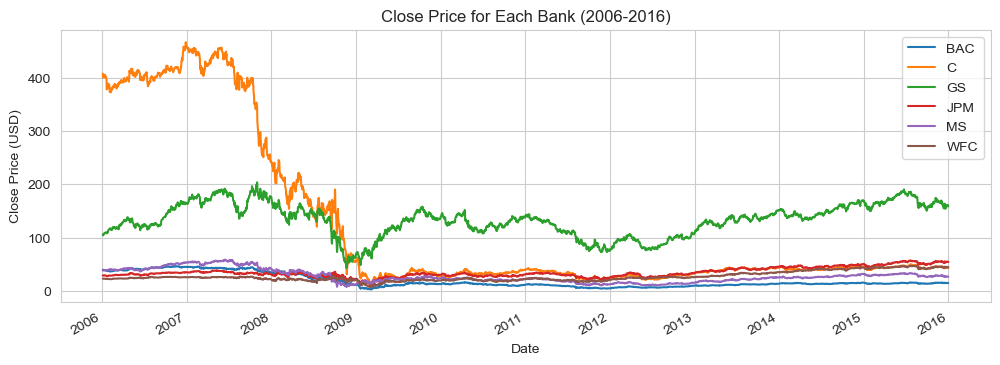

In [34]:
#Creating a line plot showing close price for each bank for the entire index of time
for tick in tickers:
    bank_data[tick]['Close'].plot(figsize=(12,4), label=tick)
plt.legend()
plt.ylabel('Close Price (USD)')
plt.title('Close Price for Each Bank (2006-2016)')

/var/folders/wb/jk4brrls4zn4rjy_dwvvwp6m0000gn/T/ipykernel_22862/3440379113.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
/var/folders/wb/jk4brrls4zn4rjy_dwvvwp6m0000gn/T/ipykernel_22862/3440379113.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')


Text(0.5, 1.0, 'Average Stock for Bank of America During 2008')

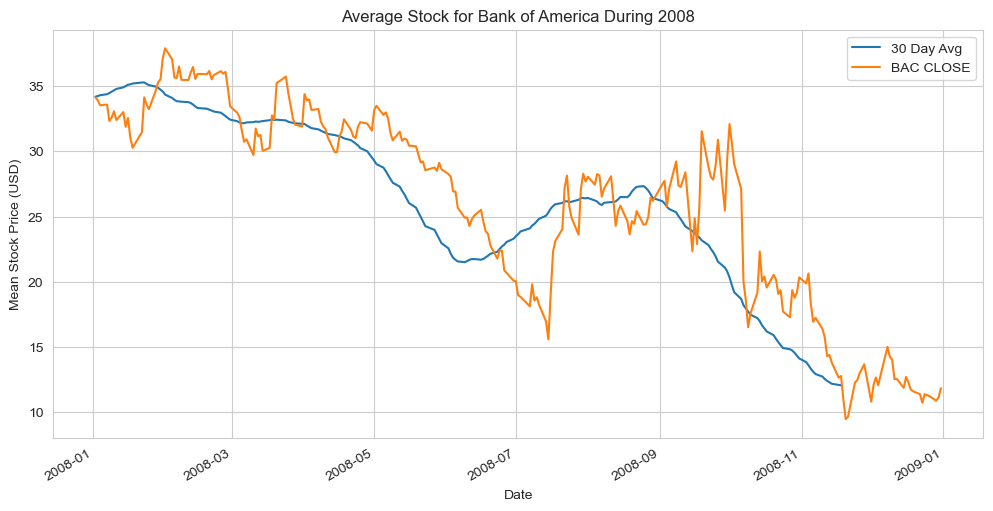

In [38]:
#Analyzing the moving averages for these stocks in the year 2008
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()
plt.ylabel('Mean Stock Price (USD)')
plt.title('Average Stock for Bank of America During 2008')

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

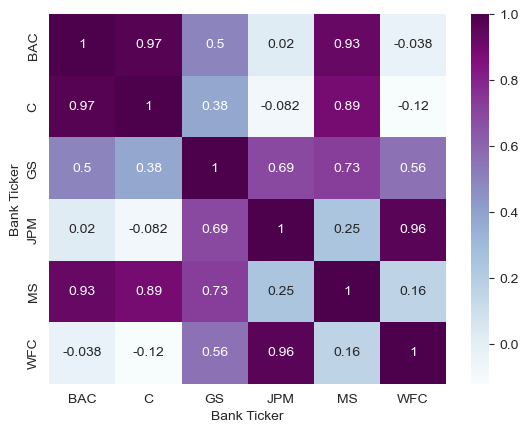

In [40]:
#Creating a heatmap for the correlation between the stocks Closing Price
sns.heatmap(bank_data.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True, cmap='BuPu')

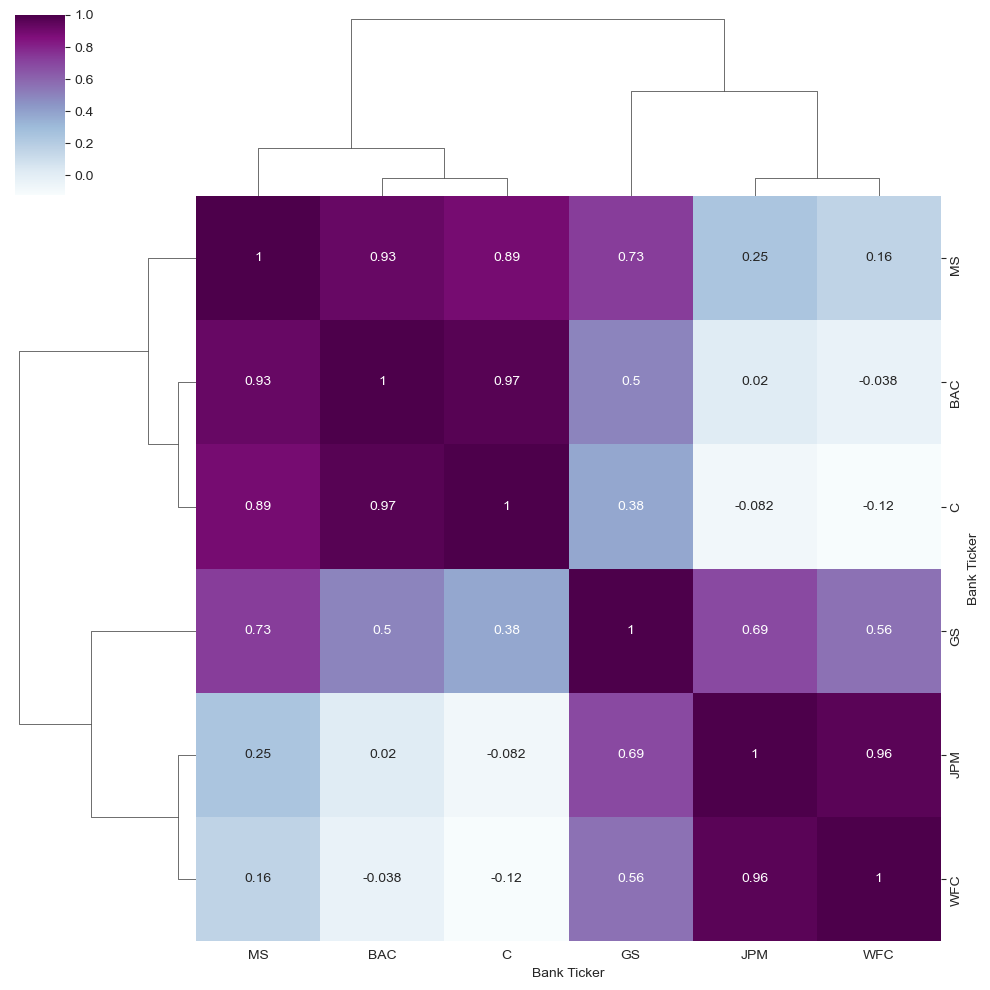

In [42]:
sns.clustermap(bank_data.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True, cmap='BuPu')